<a href="https://colab.research.google.com/github/hsallrounder/Cognitive-Analytics-Lab/blob/main/LSTM_%26_GRU_for_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [18]:
data = sns.load_dataset("flights")

In [19]:
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
ts_data = data['passengers'].values.reshape(-1, 1)

In [21]:
ts_data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [22]:
scaler = MinMaxScaler()
ts_data_normalized = scaler.fit_transform(ts_data)

In [23]:
train_size = int(len(ts_data_normalized) * 0.7)
train_data = ts_data_normalized[:train_size]
test_data = ts_data_normalized[train_size:]

In [24]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [25]:
seq_length = 12
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [26]:
lstm_model = Sequential([
    LSTM(units=128, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64, activation='relu'),
    Dense(units=1)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 3s 240ms/step - loss: 0.0735 - val_loss: 0.3608
Epoch 2/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0530 - val_loss: 0.2727
Epoch 3/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0338 - val_loss: 0.1758
Epoch 4/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0157 - val_loss: 0.0667
Epoch 5/100
3/3 [==============================] - 0s 71ms/step - loss: 0.0103 - val_loss: 0.0212
Epoch 6/100
3/3 [==============================] - 0s 69ms/step - loss: 0.0155 - val_loss: 0.0263
Epoch 7/100
3/3 [==============================] - 0s 65ms/step - loss: 0.0097 - val_loss: 0.0521
Epoch 8/100
3/3 [==============================] - 0s 66ms/step - loss: 0.0082 - val_loss: 0.0765
Epoch 9/100
3/3 [==============================] - 0s 77ms/step - loss: 0.0093 - val_loss: 0.0758
Epoch 10/100
3/3 [==============================] - 0s 78ms/step - loss: 0.0085 - val_loss: 0.0571
Epoch 11/100
3/3 [

In [27]:
gru_model = Sequential([
    GRU(units=128, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    GRU(units=64, activation='relu'),
    Dense(units=1)
])
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 4s 216ms/step - loss: 0.0792 - val_loss: 0.3733
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0493 - val_loss: 0.2498
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0241 - val_loss: 0.1336
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0117 - val_loss: 0.0515
Epoch 5/100
3/3 [==============================] - 0s 45ms/step - loss: 0.0151 - val_loss: 0.0355
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0151 - val_loss: 0.0488
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0101 - val_loss: 0.0721
Epoch 8/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0090 - val_loss: 0.0879
Epoch 9/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0097 - val_loss: 0.0901
Epoch 10/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0095 - val_loss: 0.0794
Epoch 11/100
3/3 [

In [28]:
lstm_loss = lstm_model.evaluate(X_test, y_test)
gru_loss = gru_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 41ms/step - loss: 0.0235


In [29]:
print(f'LSTM Model Loss: {lstm_loss}')
print(f'GRU Model Loss: {gru_loss}')

LSTM Model Loss: 0.0212082639336586
GRU Model Loss: 0.02345353737473488


In [30]:
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

1/1 [==============================] - 0s 486ms/step


In [31]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)

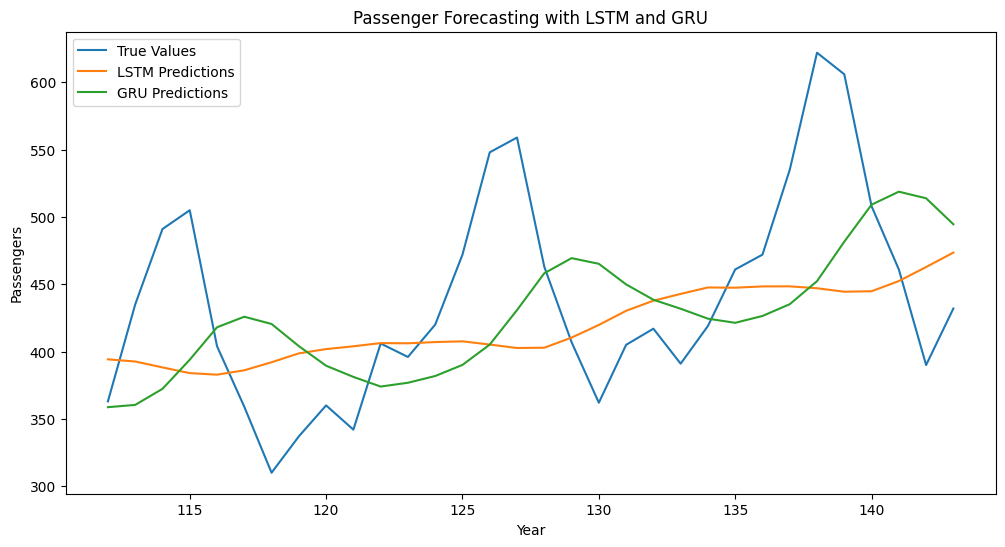

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data['passengers'].index[train_size+seq_length:], data['passengers'][train_size+seq_length:], label='True Values')
plt.plot(data['passengers'].index[train_size+seq_length:], lstm_predictions, label='LSTM Predictions')
plt.plot(data['passengers'].index[train_size+seq_length:], gru_predictions, label='GRU Predictions')
plt.legend()
plt.title('Passenger Forecasting with LSTM and GRU')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()